<img src="../DATA/corp_logo.jpg" width='160'>

# Morphological Operators

Morphological Operators are sets of kernels that can achieve a variety of effects, such as reducing noise.

Certain operators are very good at **reducing black points on a white background(and vice versa)**.

Certain operators can also acheive an **erosion** and **dilation**.

<img src='images/dilation_erosion.png'>

---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

def display_img(image):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

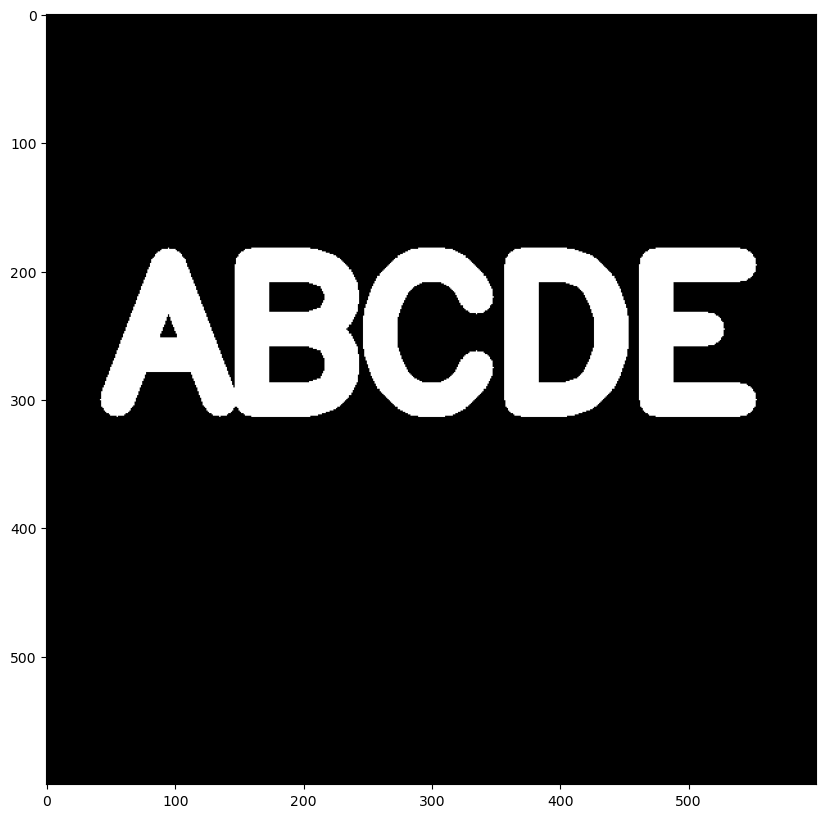

In [40]:
img = load_img()
display_img(img)

### Erosion
Erosion is a morphological operation that gradually removes the outer edges of foreground objects. It is most effective when the foreground is a light color (ideally white) and the background is dark.

In [41]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 4)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

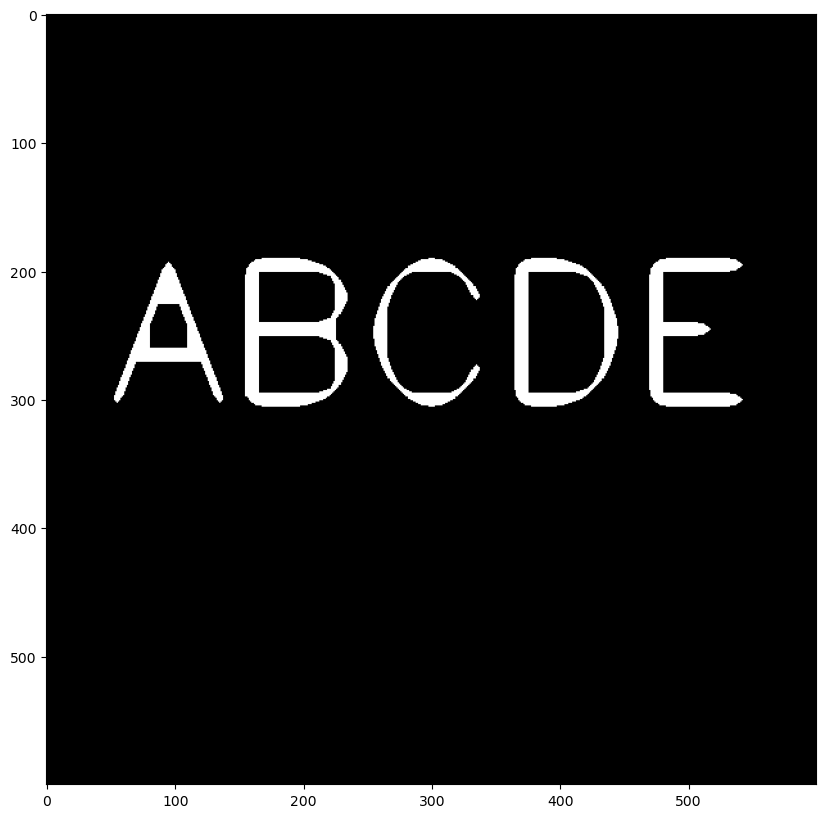

In [42]:
display_img(erosion1)

## Opening and Closing 

<img src='images/opening_closing.png'>

## Opening
Opening is a morphological operation that **combines erosion followed by dilation**. It's particularly handy for **eliminating background noise**!

In [135]:
img = load_img()

In [136]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))
white_noise

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1]])

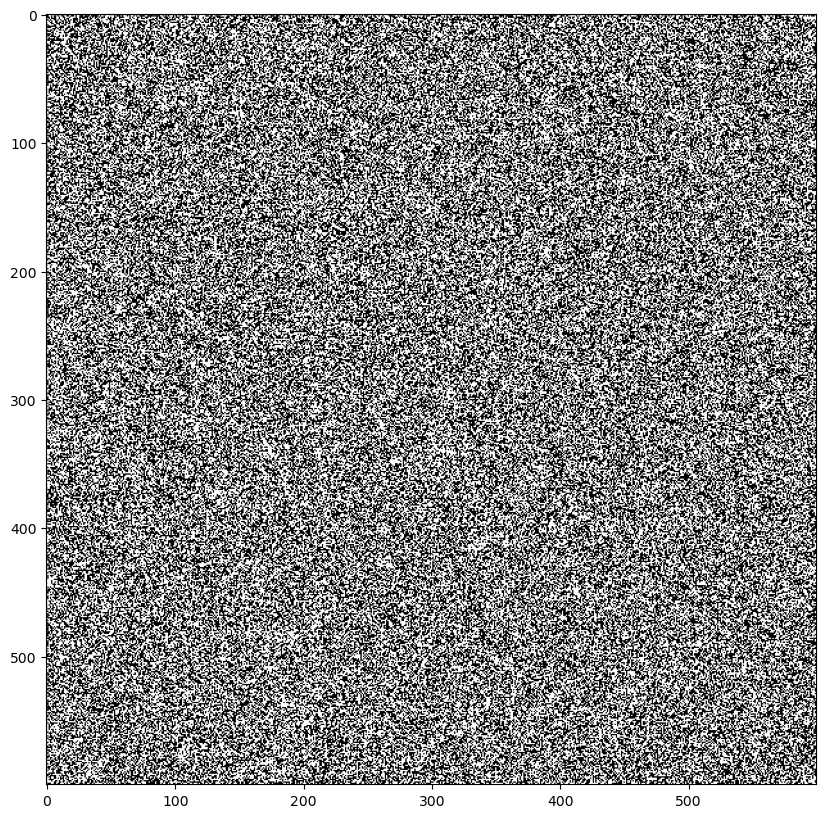

In [137]:
display_img(white_noise)

In [138]:
print ('white noise shape: ', white_noise.shape)
print ('image shape: ', img.shape)
print ('image max scale: ', img.max())

white noise shape:  (600, 600)
image shape:  (600, 600)
image max scale:  255.0


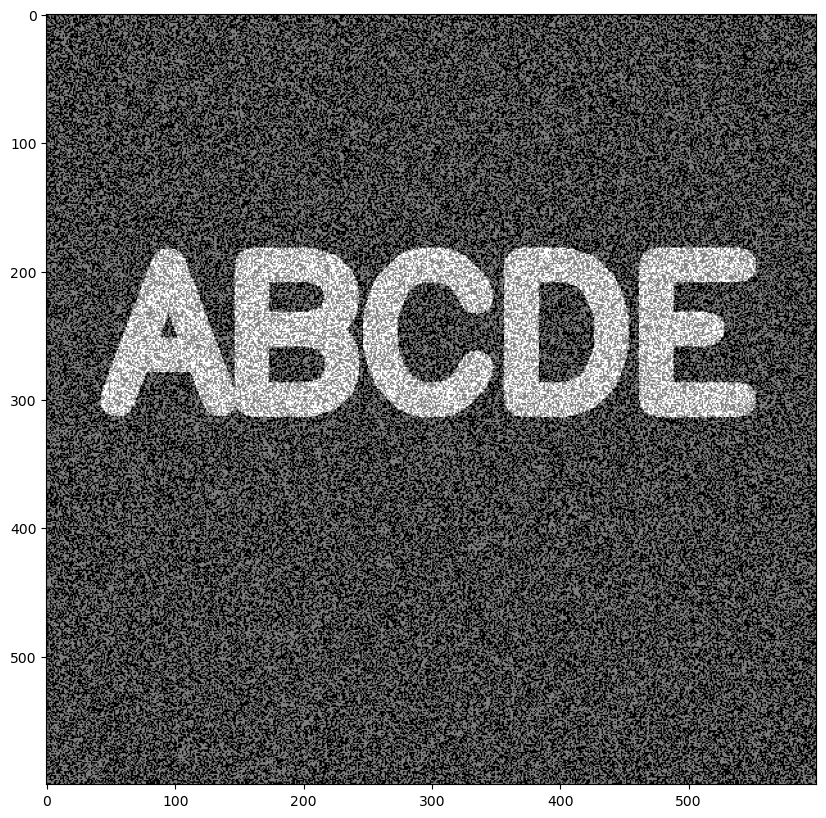

In [139]:
# Adding white noise to the image
white_noise = white_noise * 255
noise_img = white_noise + img
display_img(noise_img)

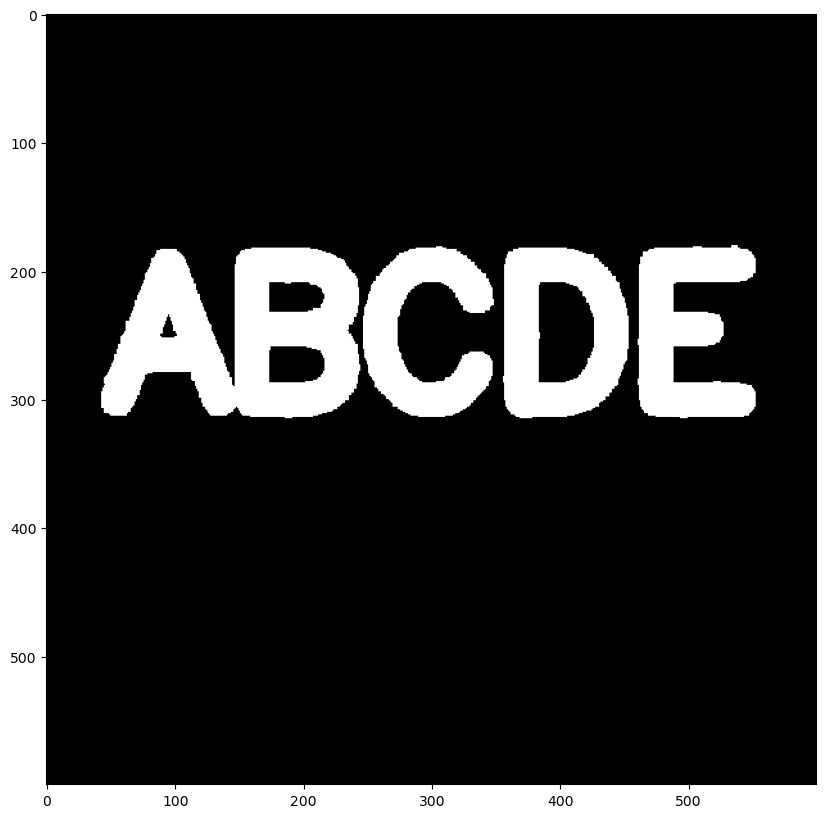

In [56]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

### Closing
Useful in **removing foreground noise**, such as black dots on top of the white text.

In [114]:
img = load_img()
#print (img.max(), img.shape, type(img))

255.0 (600, 600) <class 'numpy.ndarray'>


In [68]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [69]:
# Adding up black noise to the image
black_noise = black_noise * (-255)
black_noise_img = img + black_noise

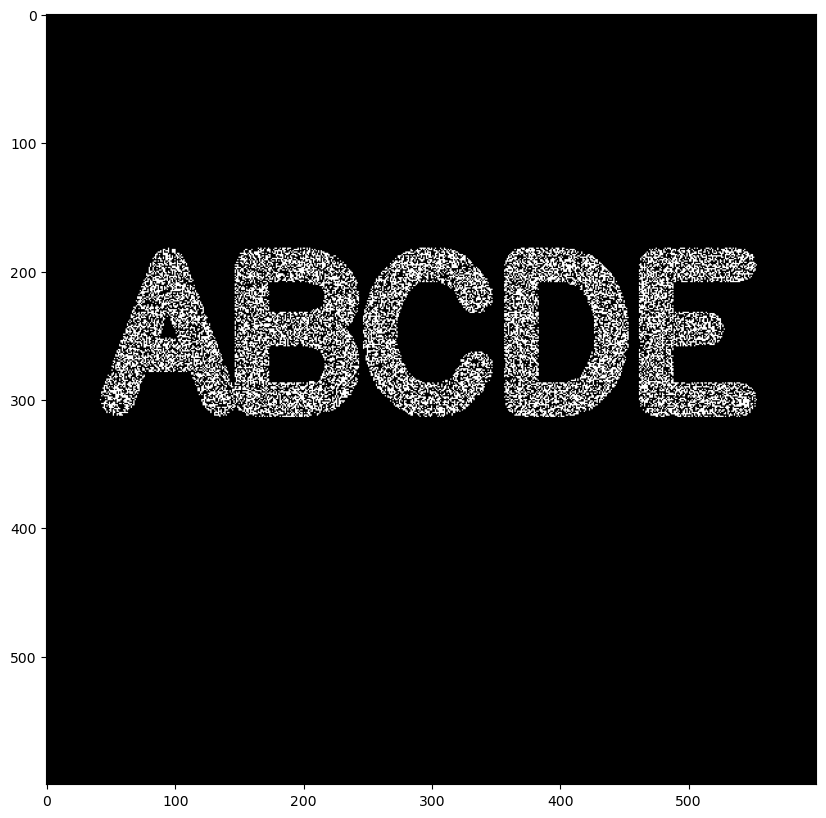

In [131]:
black_noise_img[black_noise_img == -255] = 0
display_img(black_noise_img)

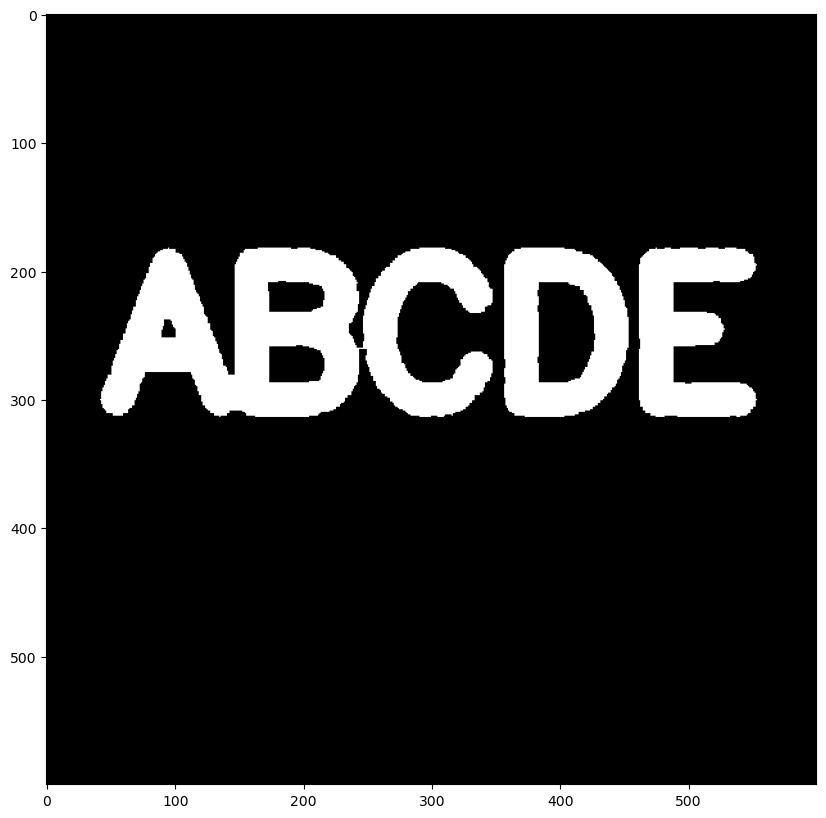

In [132]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

### Morphological Gradient

**Difference** between dilation and erosion of an image (could be considered as a simple edge detection method)

In [140]:
img = load_img()

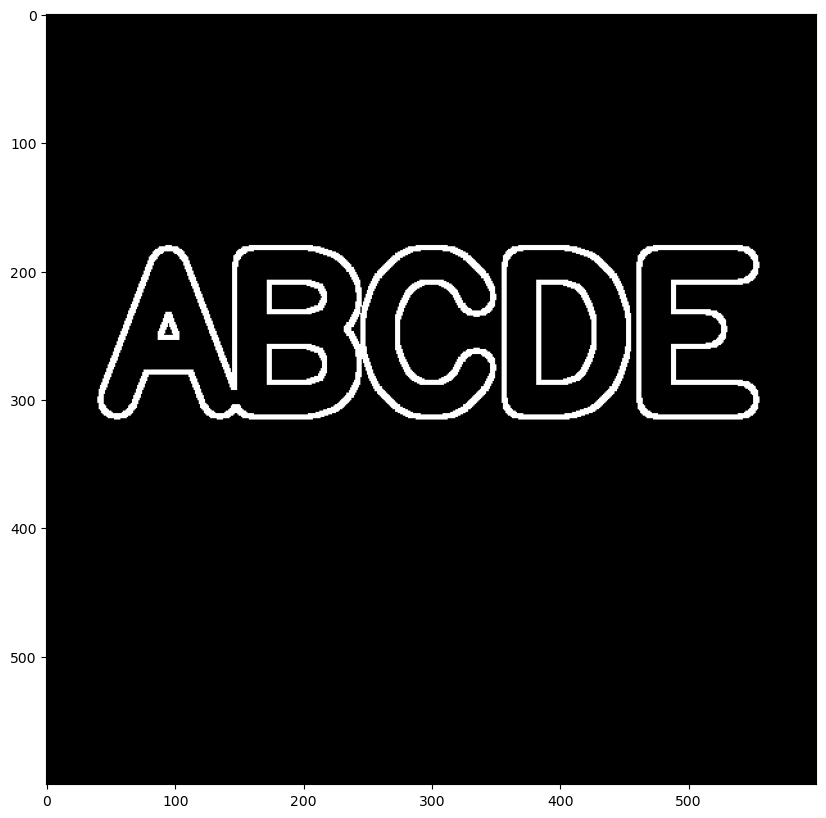

In [141]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)